# Исследование данных о компьютерных играх

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования:**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**

Данные я получу из файла `/datasets/games.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступить к цели исследования, понадобится обзор данных.

Я проверю данные на пропуски и ошибки и оценю их влияние на дальнейшее исследование. Затем, на этапе предобработки я поищу возможность избавиться от пропусков в данных так, чтобы это не привело к искажению конечного результата. Далее, создам необходимые стобцы и приступлю к проведению исследовательского анализа. После чего составлю портрет пользователя каждого региона и проверю следующие гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Таким образом, моё исследование пройдет в шесть этапов: 
1. Обзор данных.
2. Предобработка данных. 
3. Проведение исследовательского анализа данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.
6. Написание общего вывода.

**Описание данных:**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открываем файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


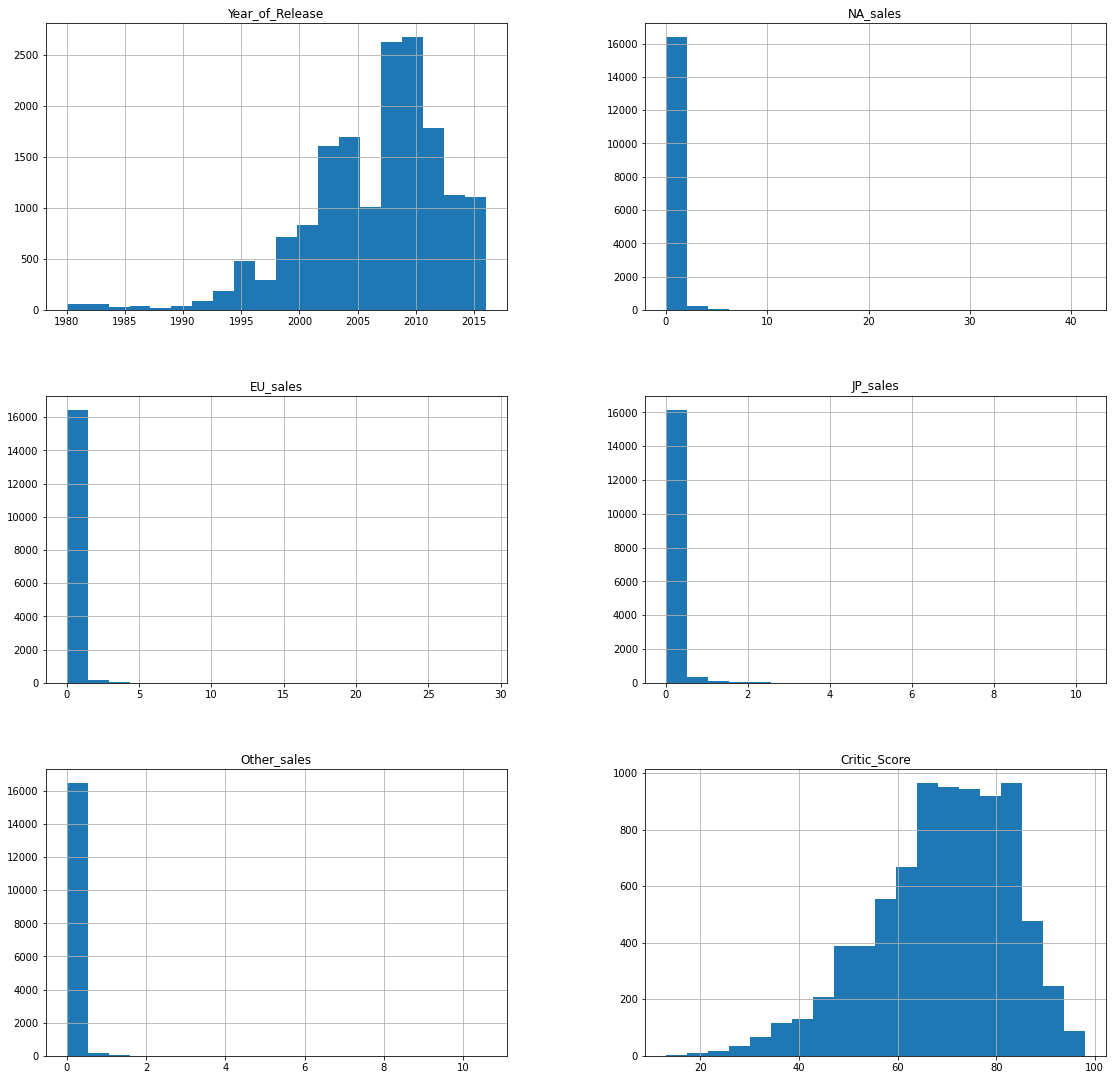

In [5]:
data.hist(figsize=(19, 19), bins=20)
plt.show();

**Вывод:**

В столбцах `Critic_Score`, `User_Score`, `Rating` довольно большое количесво пропущенных данных. В некоторых столбцах неудобный тип данных для дальнейшего анализа. Столбцы названы не по "правилу хорошего тона". Исправим))

### Предобработка данных

#### Переименовываем столбцы

In [6]:
data.rename(columns={'Year_of_Release':'year', 'NA_sales':'na',
                     'JP_sales':'jp', 'EU_sales':'eu', 'Other_sales':'other'}, inplace=True)

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изучим и обработаем пропуски

In [9]:
data.isna().sum()

name               2
platform           0
year             269
genre              2
na                 0
eu                 0
jp                 0
other              0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

In [10]:
data = data.dropna(subset = ['name']) # удалили строки без имени

In [11]:
data['year'].sort_values().unique() # посмотрим, какой период дан

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [12]:
data = data.dropna(subset = ['year'])

In [13]:
data['rating'].unique() # смотрим, какие значения есть в этом столбцах

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
data['rating'] = data['rating'].fillna('no_rating') # ставим "заглушки" на пропуски 

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

#### Обнаружили аббревиатуру 'tbd', заменим её на 'nan', то есть рейтинг не определен

In [17]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'nan'

In [18]:
data.isna().sum()

name               0
platform           0
year               0
genre              0
na                 0
eu                 0
jp                 0
other              0
critic_score    8461
user_score      6605
rating             0
dtype: int64

#### Меняем тип данных в некоторых столбцах для более удобного анализа и более эстетичного вида

In [19]:
data['year'] = data['year'].astype('int')

In [20]:
data['user_score'] = data['user_score'].astype('float')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na            16444 non-null  float64
 5   eu            16444 non-null  float64
 6   jp            16444 non-null  float64
 7   other         16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Добавим столбец с суммой всех продаж 'total'**

In [22]:
data['total'] = data[['na', 'eu', 'jp', 'other']].sum(axis=1)

In [23]:
data.head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


**Проверка на явные дубликаты**

In [24]:
data.duplicated().sum()

0

#### Вывод:

Переименовали столбцы. Пропуски в `name` и `genre` удалили. В столбце `year_of_release` заменили пропуски на 0. Также изучил значения в столбцах с оценкой критиков, пользователей и рейтингом. Пропуски могли возникнуть в силу того, что не все юзеры хотели оставлять оценку, не все оценки сохранились, или игры слишком новые, их пока не успели оценить, поэтому неизвестных значений так много. Критики же могли проверять не все игры, а, например, наиболее популярные или стоящие их внимания. Поэтому с этими данными пока ничего не делаем, они могут пригодиться для дальнейшего анализа. 

### Проведём исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

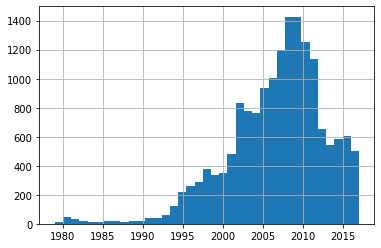

In [26]:
data['year'].hist(bins=37, range=(1979, 2017))
plt.show();

**Вывод:**

Игры начали выпускать с 1980 года, но их количество очень мало. Поэтому данные за период. с 1980 по 1994 год не так важны. А вот период 2005-2010 года - расцвет по созданию компьютерных игр.

#### Посмотрим, как менялись продажи по платформам.

In [27]:
#Выводим топ 15 самых продаваемых платформ 
#Строим сводную таблицу, сортируем ее и добавляем индексы
platforms = data.pivot_table(index = 'platform', values = 'total', aggfunc = 'sum') \
    .sort_values(by = 'total', ascending = False)
top_platforms = platforms.reset_index().head(15)
top_platforms

,platform,total
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


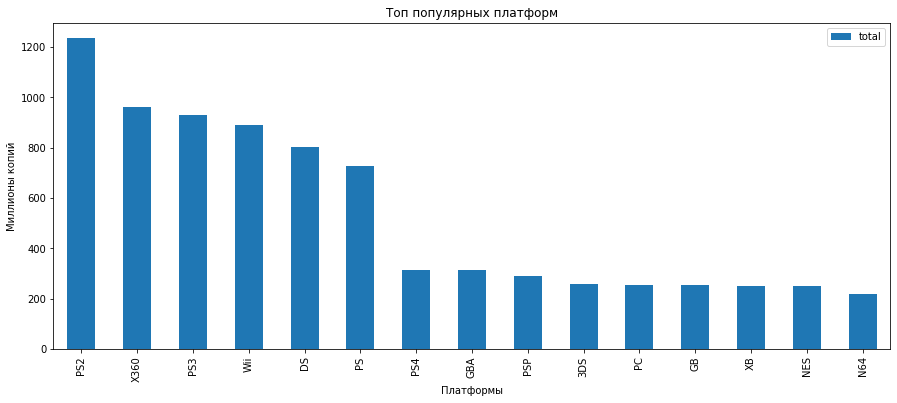

In [28]:
top_platforms.plot(x="platform", y="total", kind='bar', figsize=(15,6), title = 'Топ популярных платформ')
plt.xlabel('Платформы')
plt.ylabel('Миллионы копий')
plt.show();

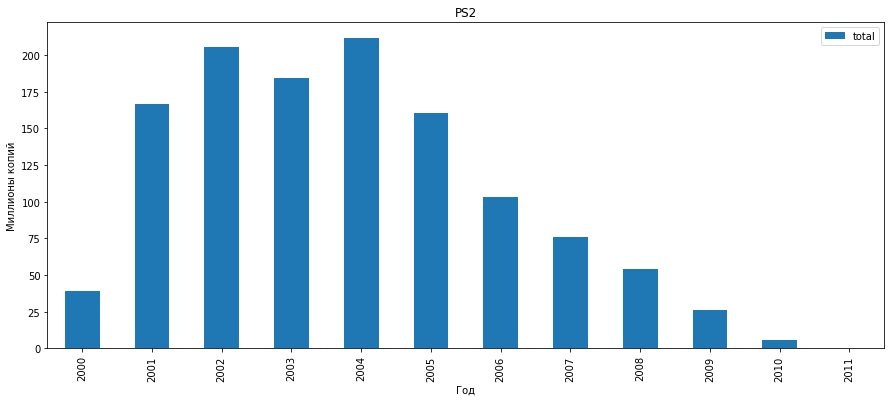

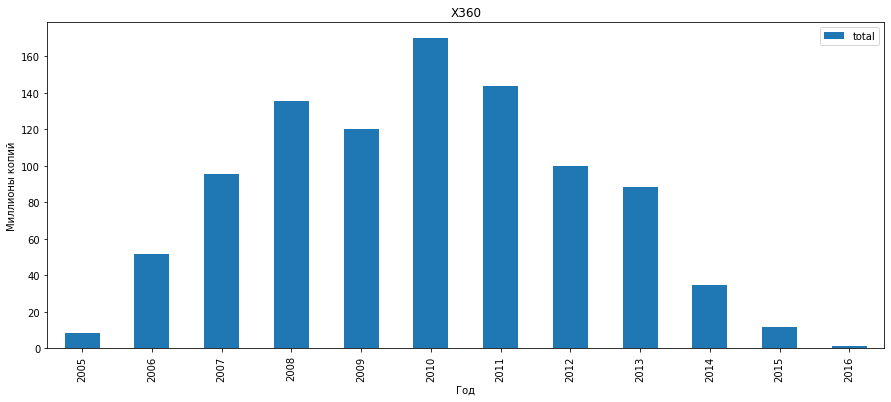

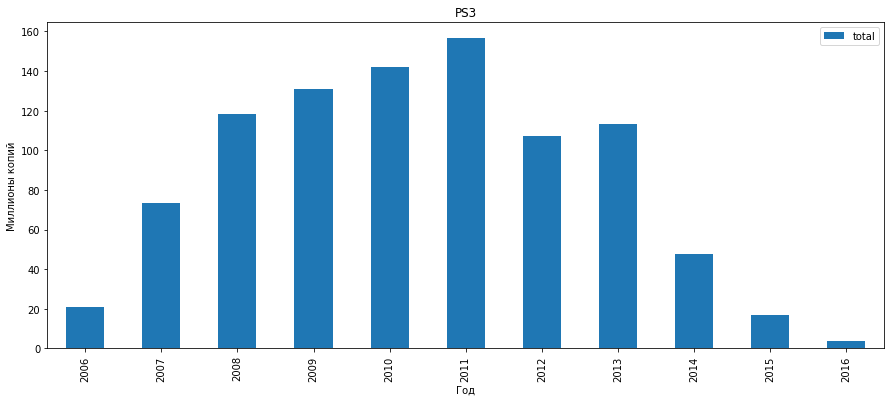

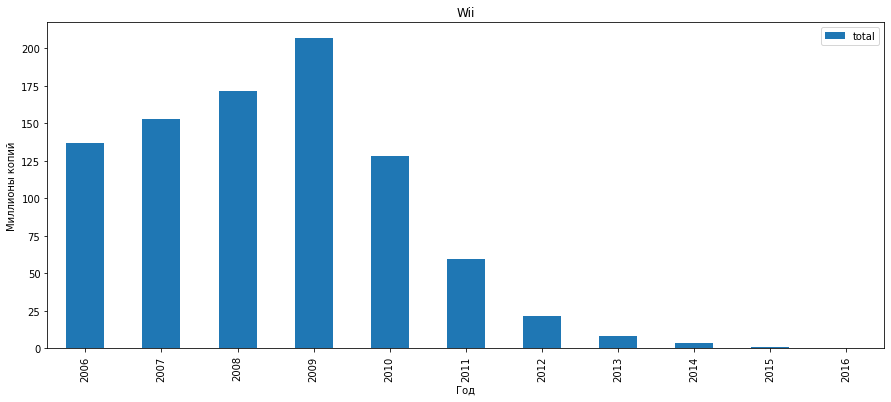

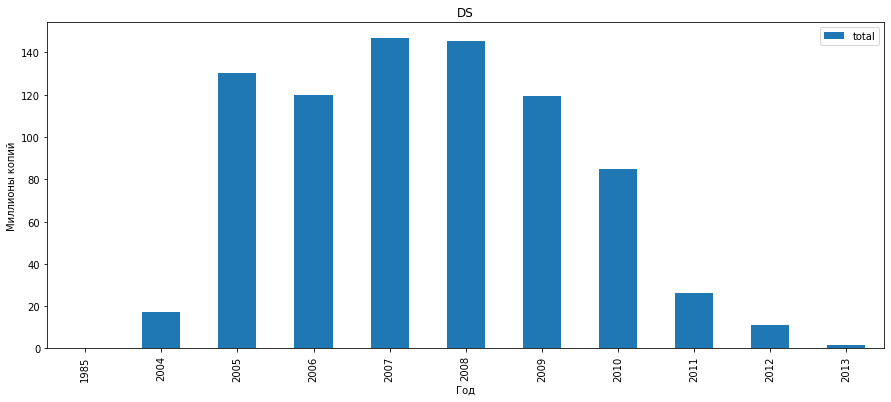

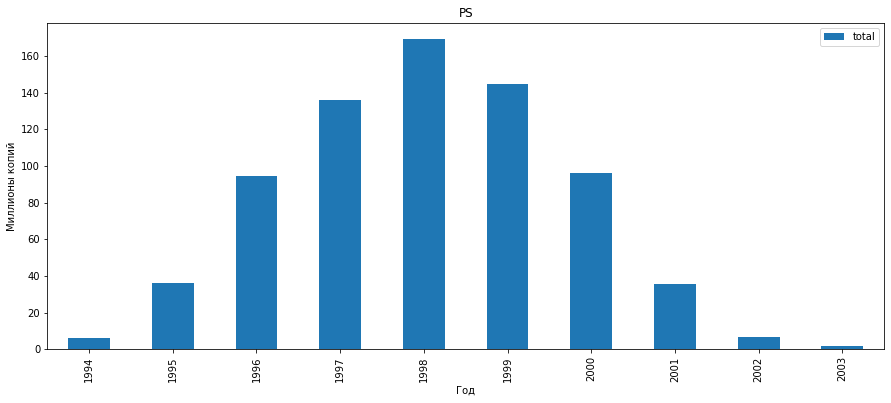

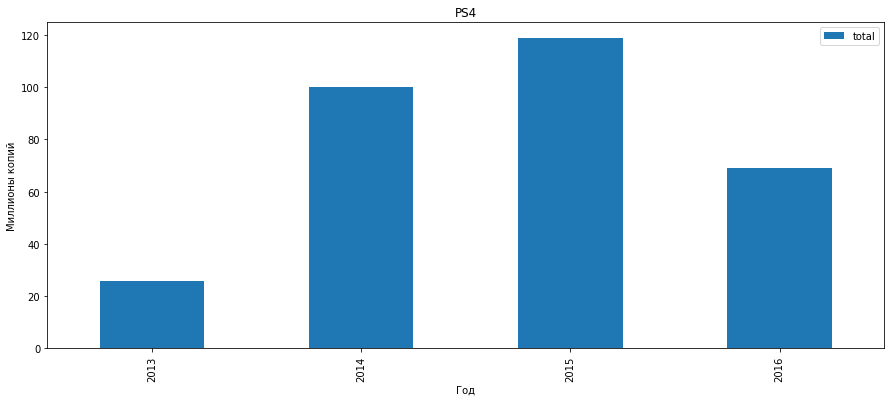

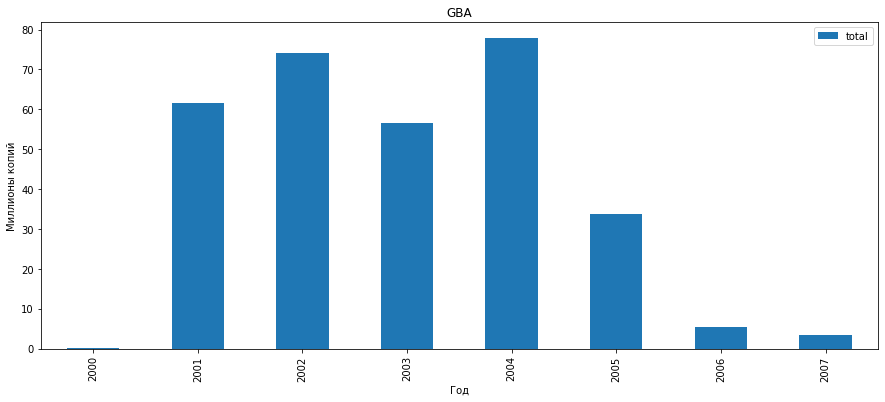

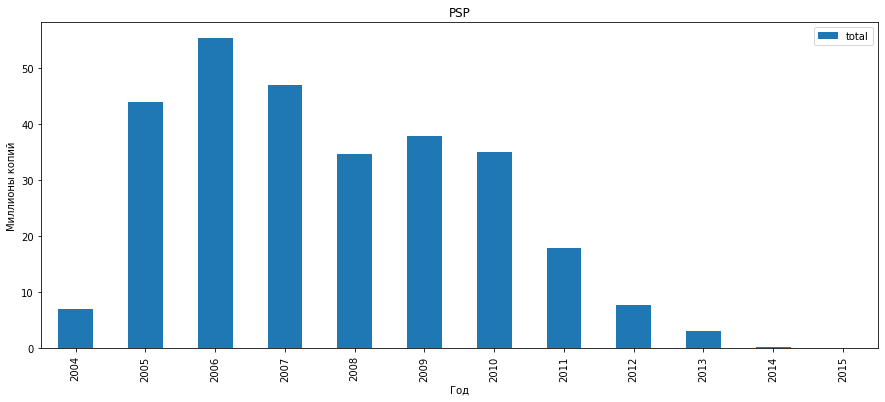

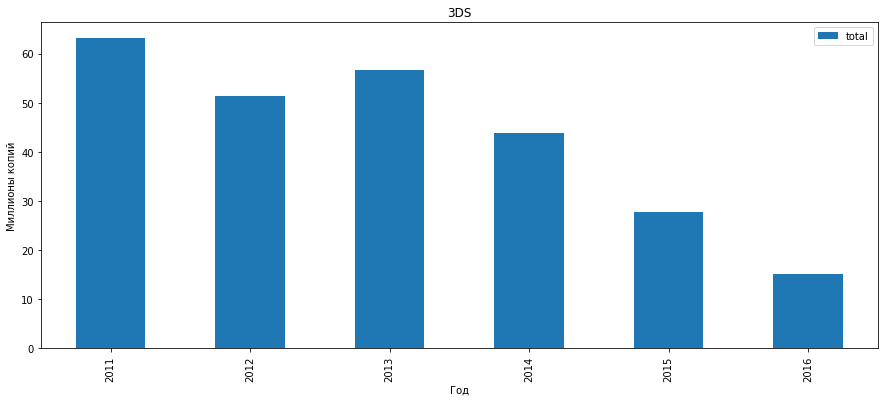

In [29]:
# 15 платформ смотрелись хорошо на предыдущем графике
# Здесь, чтобы не загружать информацией оставим 10
# В цикле построим сводные таблицы по каждой из топ 10 платформ с суммой продаж за каждый год
top_10_platforms = top_platforms['platform'].head(10)
for platform in top_10_platforms:
    data[data['platform'] == platform].pivot_table(index = 'year', values = 'total', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,6))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Миллионы копий')
#(Честно признаюсь, этот вариант я подсмотрел, но целиком в нем разобрался 
# Он куда более продуктивный чем был мой предыдущий)    

**Вывод:**

В среднем платформа живет (то есть появляется и исчезает) 10 лет.

#### Определите актуальный период в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

**Вывод:**

Из графиков, на которых видно, сколько игр выпускалось в разные годы, видно, что больше всего выпускалось в период с 2005 года и по 2016. Для наиболее точных прогнозов лучше всего взять данные за последние годы, поэтому **актульным периодом** назовем последние года, начиная с 2012.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

**Лидирующие по продажам платформы за всё время**

In [30]:
top_platforms

,platform,total
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [31]:
# база данных в "актуальный период"
# дальнейший анализ будем вести исходя из "актуальных данных"
data_actual_time = data.query('year >= 2012')

In [32]:
# строим сводную таблицу в актуальный перид, 
# чтобы дальше посмотреть, чьи продажи растут, чьи падают
platforms_actual_time = data_actual_time.pivot_table(index = 'platform', values = 'total', aggfunc = 'sum') \
    .sort_values(by = 'total', ascending = False)
platforms_actual_time = platforms_actual_time.reset_index()
platforms_actual_time

,platform,total
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


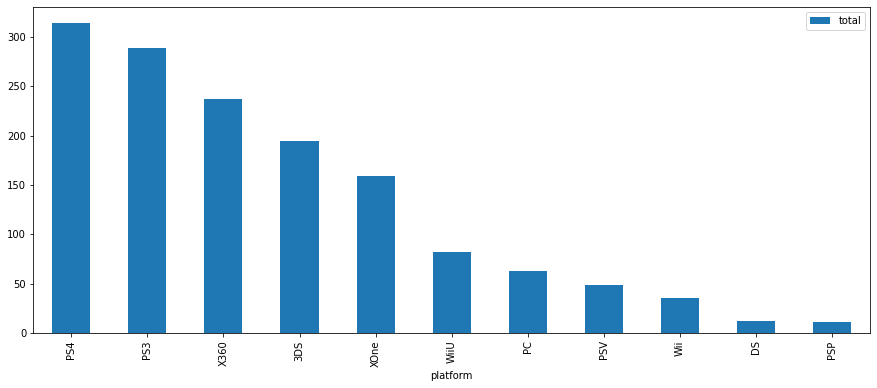

In [33]:
platforms_actual_time.plot(kind='bar',x='platform', y='total',figsize=(15, 6))
plt.show();

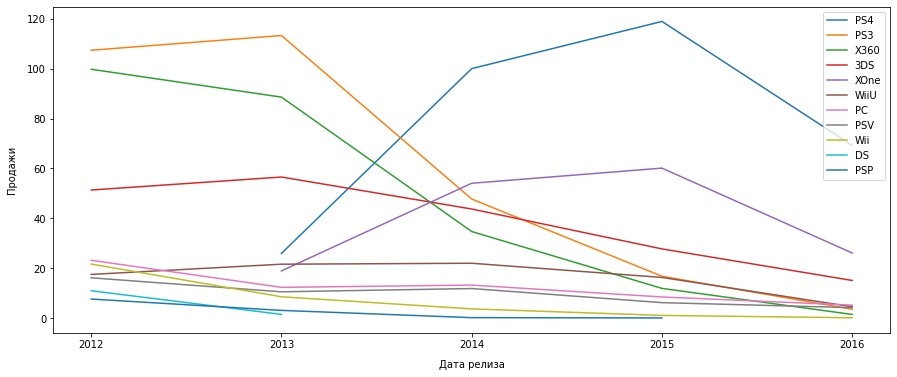

In [34]:
for name in platforms_actual_time['platform']:
    data_actual_time[data_actual_time['platform'] == name].pivot_table(index = 'year',
                        values = 'total', aggfunc = 'sum').sort_values('year',
                                                    ascending = False)['total'].plot(figsize=(15, 6),
                                                                                     label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

**Вывод:**

Во взятый **актуальный период** по продажам лидируют такие компании, как: PS4, PS3 и X360. Это мы можем увидеть на столбчатой диаграмме. 

Из второго графика видно, что все продажи падают. Самые хорошие продажи показывают компании PS4 и XOne, они являются потенциально самыми прибыльными.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [35]:
potential_platforms = data_actual_time.query('platform == "PS4" or platform == "XOne"')

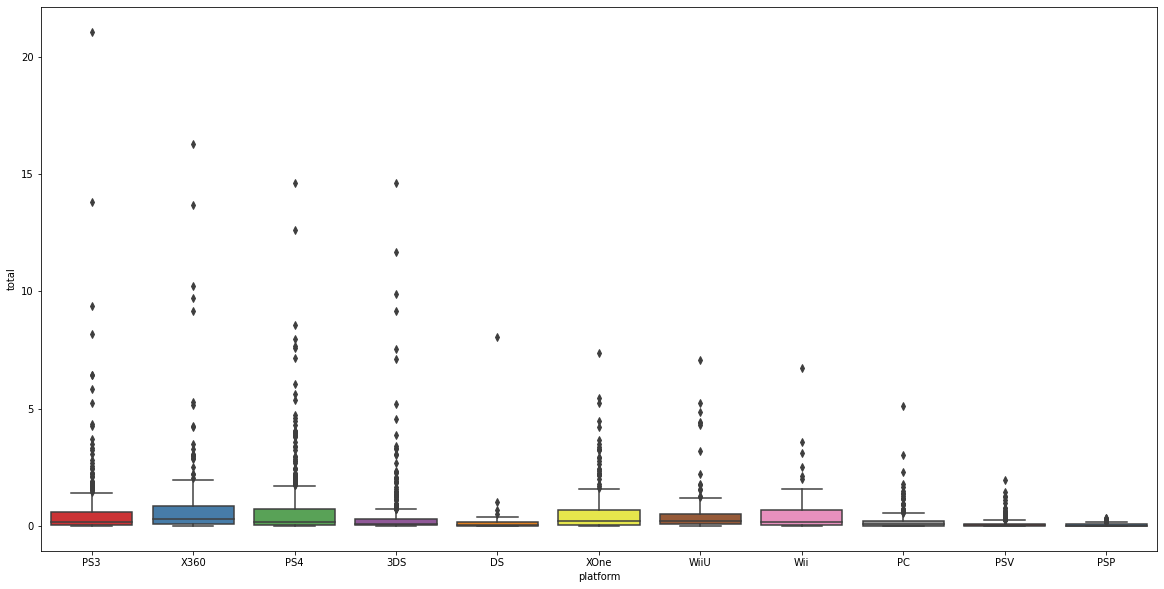

In [36]:
# диаграмма размаха топ платформ со всеми выбросами 
plt.figure(figsize=(20, 10))
ax = seaborn.boxplot(x="platform", y="total", data= data_actual_time, palette="Set1")
plt.show();

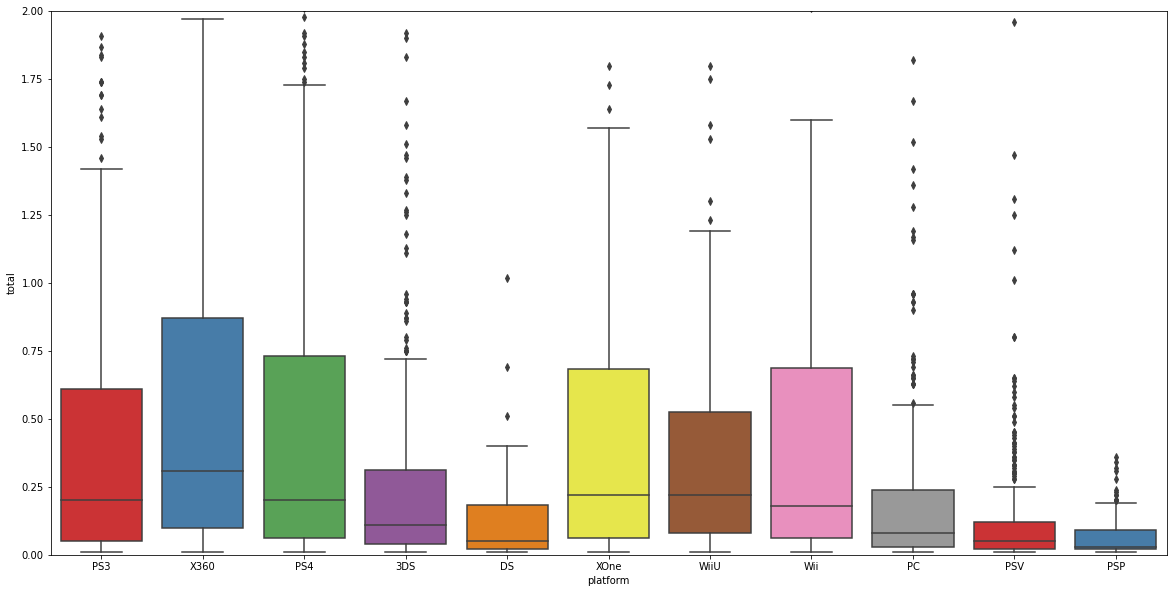

In [66]:
# диаграммы размаха каждой платформы в масштабированном виде с крупными боксплотами
plt.figure(figsize=(20, 10))
ax = seaborn.boxplot(x="platform", y="total", data= data_actual_time, palette="Set1")
plt.ylim(0, 2)
plt.show();

In [38]:
mean_potential_platforms = data_actual_time.pivot_table(index = 'platform',
                                                           values = 'total', aggfunc = ['mean', 'median'])
mean_potential_platforms

,mean,median
,total,total
platform,,
3DS,0.491439,0.11
DS,0.404839,0.05
PC,0.250600,0.08
PS3,0.585781,0.20
PS4,0.801378,0.20
PSP,0.064682,0.03
PSV,0.119659,0.05
Wii,0.655000,0.18


In [77]:
print('Среднее от средних продаж топ платформ:', mean_potential_platforms['mean'].mean().to_list()[0], 'миллионов копий')
print('Медиана от медиан продаж топ платформ:', mean_potential_platforms['median'].median().to_list()[0], 'миллионов копий')

Среднее от средних продаж топ платформ: 0.48978021984961023 миллионов копий
Медиана от медиан продаж топ платформ: 0.18 миллионов копий


**Вывод:**

Мы видим, что в среднем одна игра, выпущенная на платформе продается в размере около 500 тысяч копий. Однако, наверняка есть убыточные игры, как и, наоборот, очень популярные! Поэтому больше внимание стоит обратить на медианное значение - чуть менее 200 тысяч копий.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**Зависимость продаж от оценки пользователей**

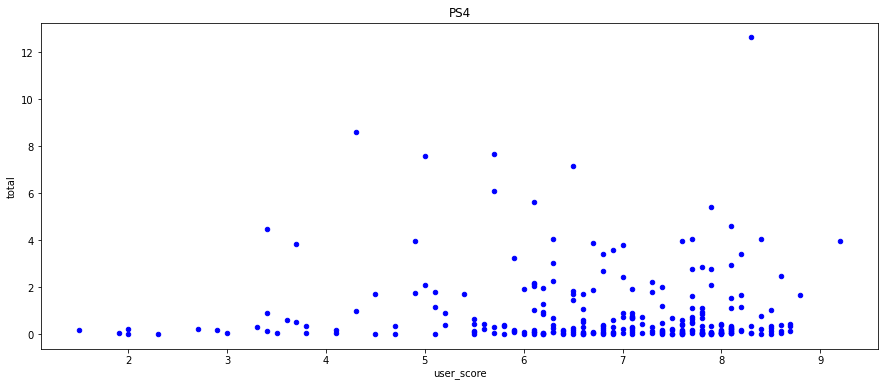

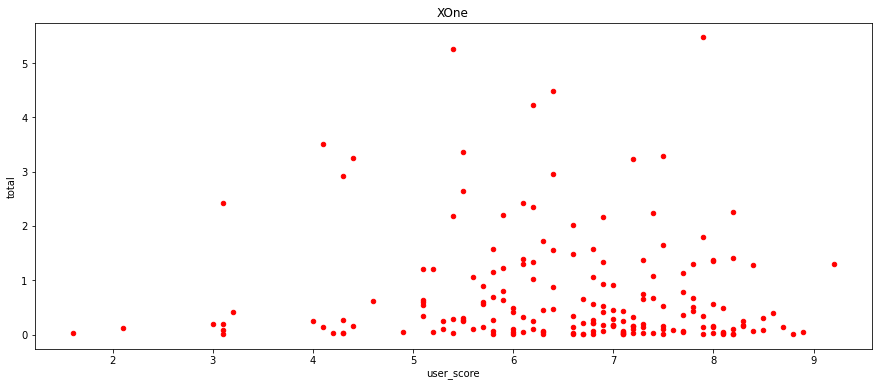

In [40]:
ps4 = data_actual_time.query('platform == "PS4"')
xone = data_actual_time.query('platform == "XOne"')
ps4.plot(x = 'user_score', y = 'total', kind = 'scatter', title = 'PS4', figsize = (15, 6), color = 'blue')
xone.plot(x = 'user_score', y = 'total', kind = 'scatter', title = 'XOne', figsize = (15, 6), color = 'red')
plt.show();

**Корреляция `user_score` и `total` оценки пользователей и общих продаж для платформ PS4 и XOne**

In [41]:
print('PS4:', ps4['user_score'].corr(ps4['total']))
print('XOne:', xone['user_score'].corr(xone['total']))

PS4: -0.031957110204556376
XOne: -0.06892505328279414


**Зависимость продаж от оценки критиков**

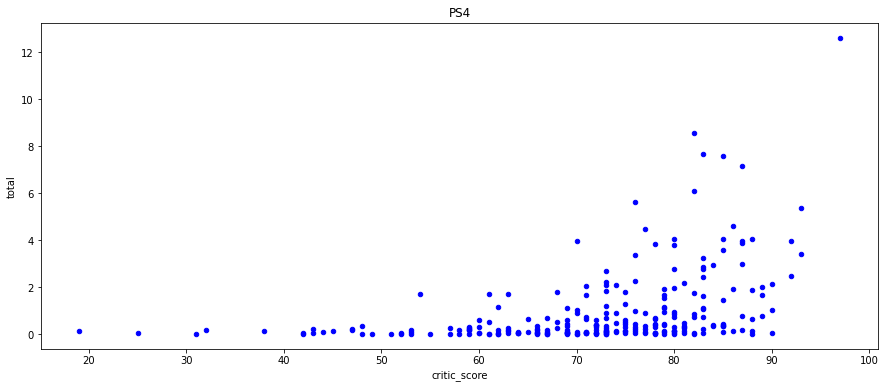

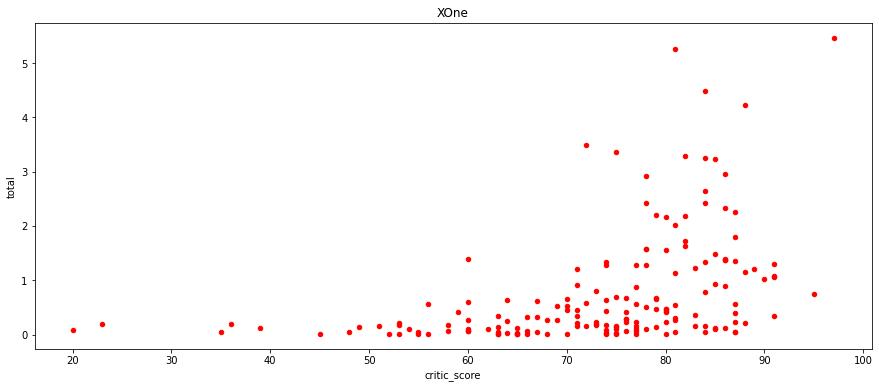

In [42]:
ps4.plot(x = 'critic_score', y = 'total', kind = 'scatter', title = 'PS4', figsize = (15, 6), color = 'blue')
xone.plot(x = 'critic_score', y = 'total', kind = 'scatter', title = 'XOne', figsize = (15, 6), color = 'red')
plt.show();

**Корреляция `critic_score` и `total` оценки пользователей и общих продаж для платформ PS4 и XOne**

In [43]:
print('PS4:', ps4['critic_score'].corr(ps4['total']))
print('XOne:', xone['critic_score'].corr(xone['total']))

PS4: 0.40656790206178095
XOne: 0.4169983280084017


**Вывод:**

- Оценки пользователей НЕ влияют на продажи; 
- Оценки критиков влияют на продажи, по графикам видно, что чем больше оценка, тем выше продажи. Однако корреляция не сильная. Нельзя уверенно утверждать, что высокие оценки критиков являются причиной высоких продаж.

#### Соотнесём выводы с продажами игр на других платформах.

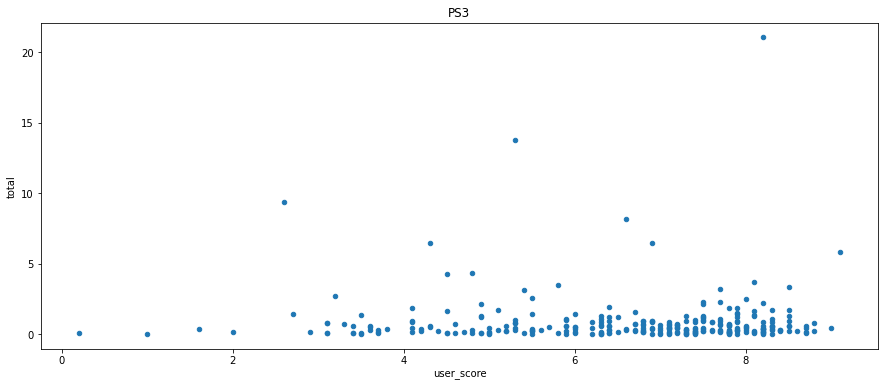

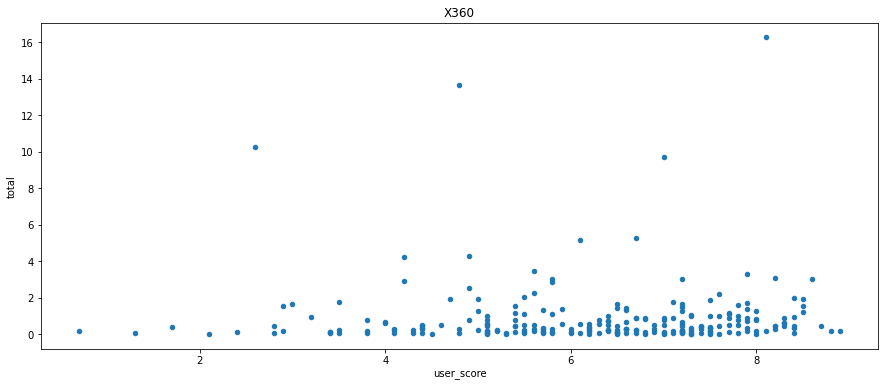

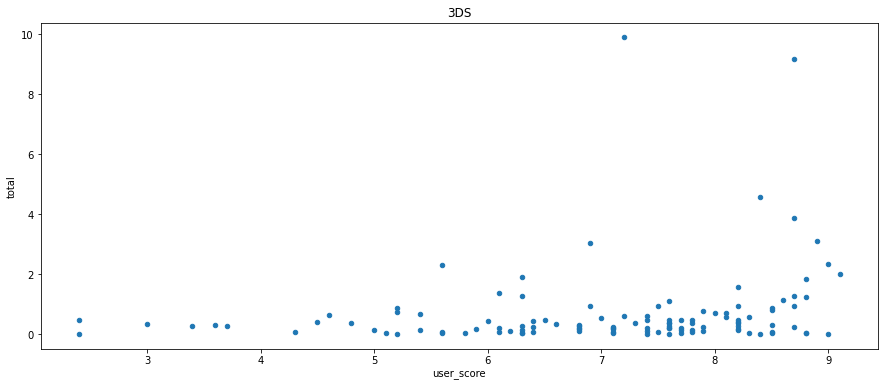

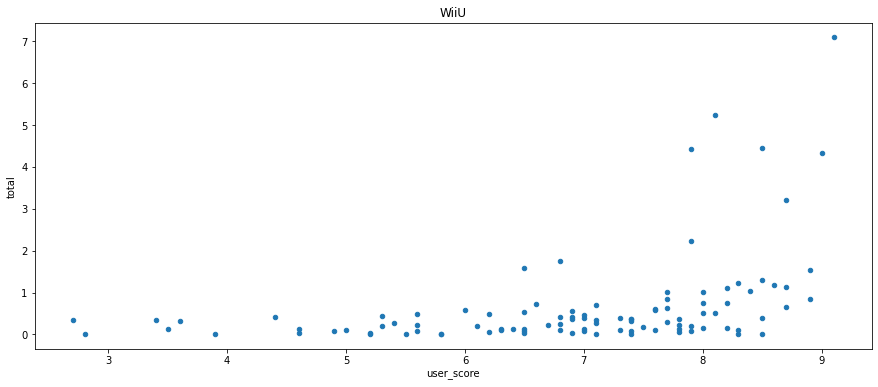

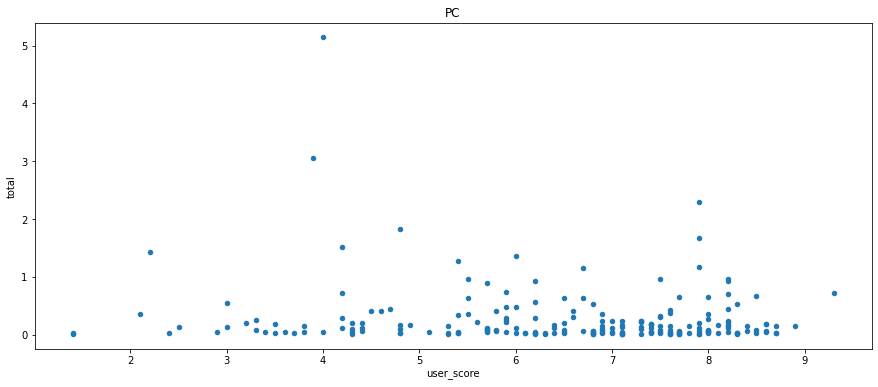

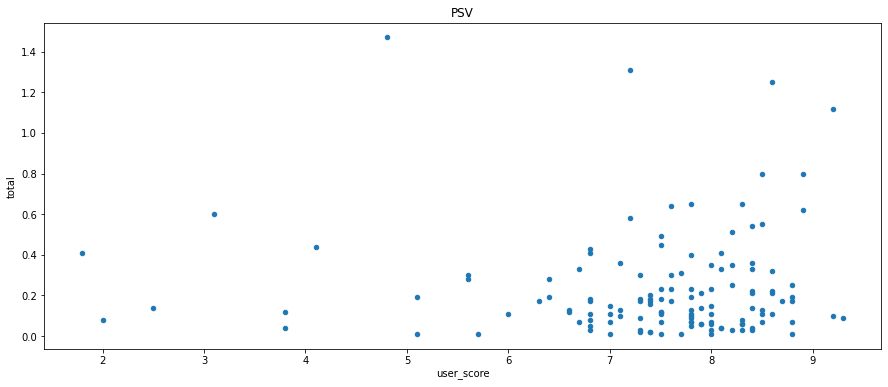

In [44]:
other_platforms_list = [ 'PS3', 'X360', '3DS', 'WiiU', 'PC', 'PSV']
for other in other_platforms_list:
    (data_actual_time[data_actual_time['platform'] == other]
     .plot(x = 'user_score', y = 'total',kind = 'scatter', title = other, figsize = (15, 6))
    )
    plt.show();

**Корреляция оценки пользователей и продаж**

In [45]:
for other in other_platforms_list:
    print(f'Корреляция оценки пользователей и продаж на платформе {other}')
    (print(data_actual_time[data_actual_time['platform'] == other]['user_score']
           .corr(data_actual_time[data_actual_time['platform'] == other]['total']))
    )

Корреляция оценки пользователей и продаж на платформе PS3
-0.005143522887113828
Корреляция оценки пользователей и продаж на платформе X360
0.006163978646213326
Корреляция оценки пользователей и продаж на платформе 3DS
0.19758263411038599
Корреляция оценки пользователей и продаж на платформе WiiU
0.4002190202148617
Корреляция оценки пользователей и продаж на платформе PC
-0.12186747630735577
Корреляция оценки пользователей и продаж на платформе PSV
-0.004339437514314869


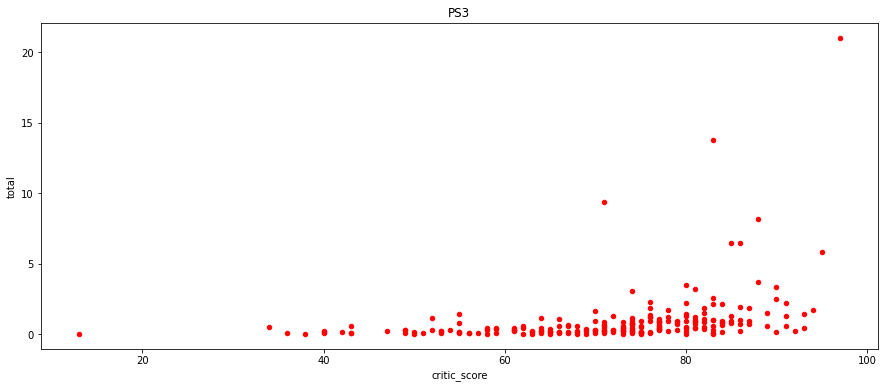

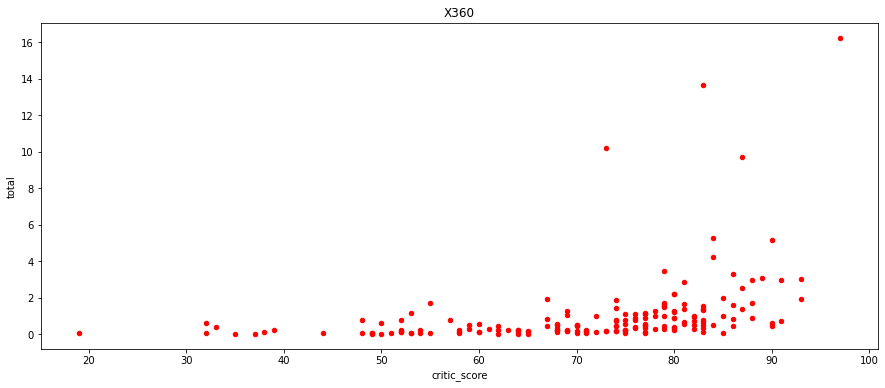

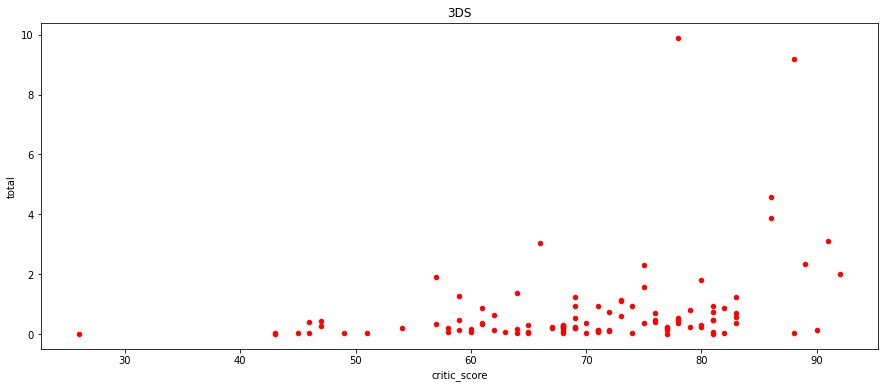

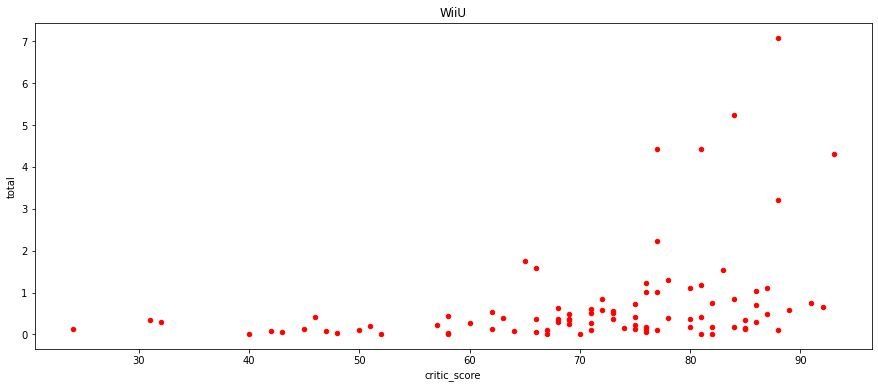

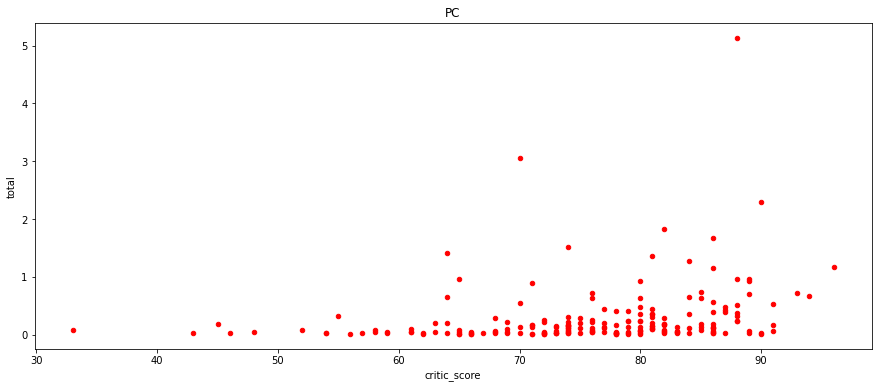

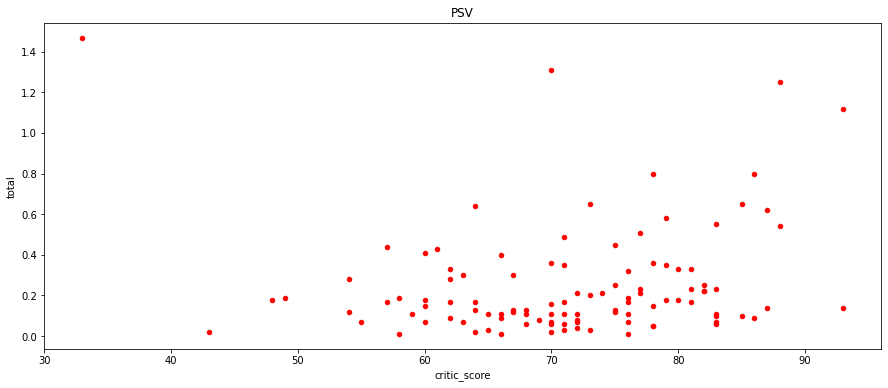

In [46]:
for other in other_platforms_list:
    (data_actual_time[data_actual_time['platform'] == other]
     .plot(x = 'critic_score', y = 'total',kind = 'scatter', title = other, figsize = (15, 6), color = 'red')
    )
    plt.show();

**Корреляция оценки критиков и продаж**

In [47]:
for other in other_platforms_list:
    print(f'Корреляция оценки критиков и продаж на платформе {other}')
    (print(data_actual_time[data_actual_time['platform'] == other]['critic_score']
           .corr(data_actual_time[data_actual_time['platform'] == other]['total']))
    )

Корреляция оценки критиков и продаж на платформе PS3
0.3314972592629587
Корреляция оценки критиков и продаж на платформе X360
0.3605734888507336
Корреляция оценки критиков и продаж на платформе 3DS
0.3208028695360785
Корреляция оценки критиков и продаж на платформе WiiU
0.34837976012017485
Корреляция оценки критиков и продаж на платформе PC
0.23724324311567915
Корреляция оценки критиков и продаж на платформе PSV
0.0944878992931617


**Вывод:**

Мы видим тот же результат. Зависимости продаж от оценок пользователей нет, а от оценок критиков - слабая. А на платформах DS, Wii и PSP оценок пользователей вообще практически нет.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [48]:
genres = data.pivot_table(index = 'genre', values = 'total', aggfunc ='sum') \
    .sort_values(by = 'total', ascending = False)
genres = genres.reset_index()
genres

,genre,total
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


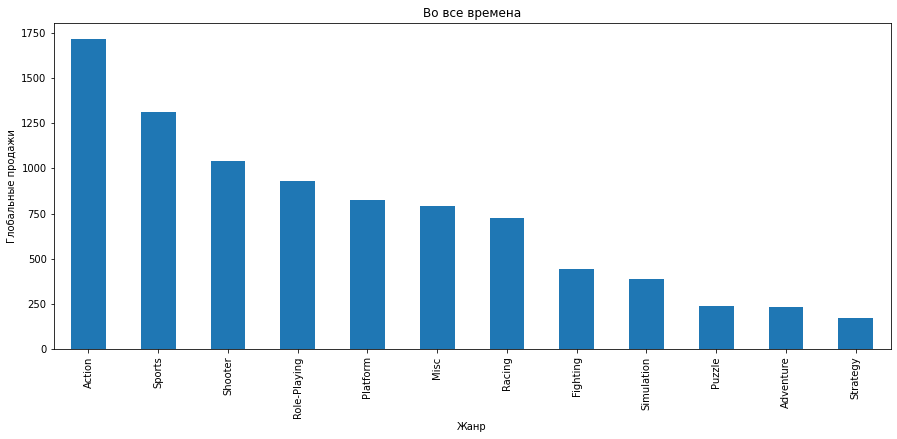

In [49]:
genres.plot(x = 'genre', y = 'total', kind = 'bar', figsize = (15, 6), legend = False, title = 'Во все времена') \
    .set(xlabel='Жанр', ylabel='Глобальные продажи')
plt.show();

In [50]:
genre_actual_time = data_actual_time.pivot_table(index = 'genre', values = 'total', aggfunc ='sum') \
    .sort_values(by = 'total', ascending = False)
genre_actual_time = genre_actual_time.reset_index()
genre_actual_time

,genre,total
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


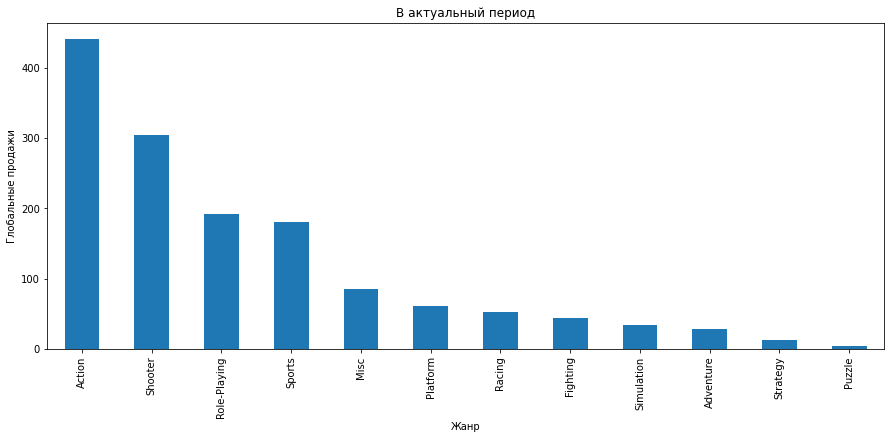

In [51]:
genre_actual_time.plot(x = 'genre', y = 'total', kind = 'bar',
                       figsize = (15, 6), legend = False, title = 'В актуальный период') \
    .set(xlabel='Жанр', ylabel='Глобальные продажи')
plt.show();

**Таблица медиан продаж по платформам**

In [52]:
median_genres = data_actual_time.pivot_table(index = 'genre',
                                             columns = 'platform', values = 'total', aggfunc ='median')
# добавим столбец с медианой по всем платформам 
median_genres['total_median'] = median_genres[['3DS', 'DS', 'PC', 'PS3',
                                               'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']].median(axis=1)
median_genres = median_genres.sort_values(by = 'total_median', ascending = False)
median_genres

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,total_median
genre,,,,,,,,,,,,
Shooter,0.065,NaN,0.220,0.385,0.970,NaN,0.565,NaN,0.120,0.470,1.095,0.4275
Sports,0.205,0.055,0.060,0.360,0.525,0.140,0.100,0.380,0.365,0.465,0.335,0.3350
Platform,0.210,0.345,0.060,0.250,0.300,NaN,0.085,1.125,0.580,0.110,0.160,0.2300
Role-Playing,0.220,4.540,0.160,0.160,0.200,0.090,0.070,0.530,0.410,0.490,0.320,0.2200
Racing,0.280,NaN,0.030,0.170,0.230,NaN,0.050,0.010,0.510,0.230,0.185,0.1850
Fighting,0.080,NaN,0.050,0.190,0.170,0.015,0.115,NaN,0.190,0.225,0.200,0.1700
Action,0.090,0.040,0.090,0.260,0.155,0.040,0.050,0.150,0.150,0.335,0.150,0.1500
Simulation,0.135,0.210,0.110,0.120,0.210,0.060,0.010,0.110,0.200,0.175,0.160,0.1350
Strategy,0.060,NaN,0.065,0.140,0.080,0.165,0.050,0.260,0.100,0.450,0.170,0.1200


**Боксплоты по продажам каждого жанра**

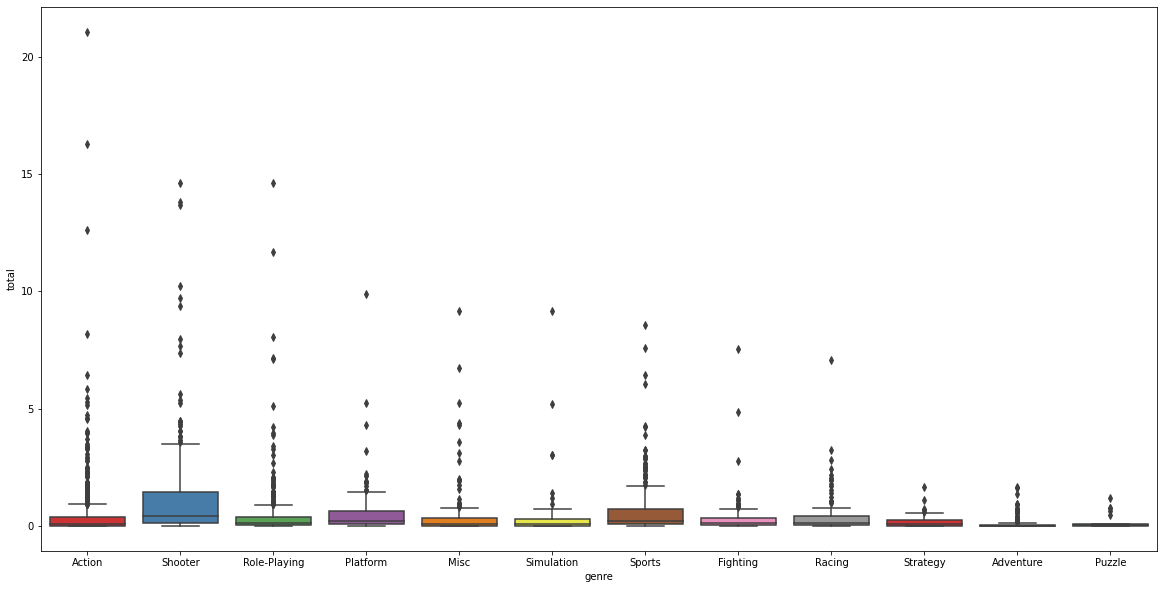

In [53]:
plt.figure(figsize=(20, 10))
ax = seaborn.boxplot(x="genre", y="total", data= data_actual_time, palette="Set1")
plt.show();

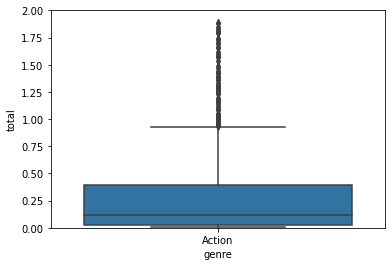

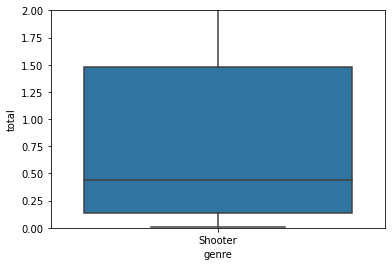

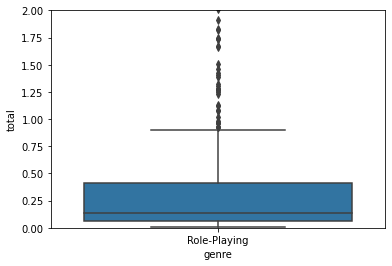

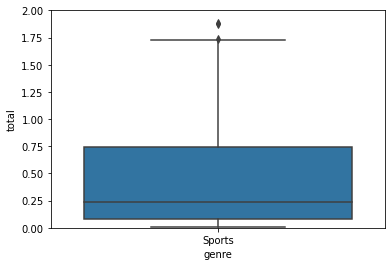

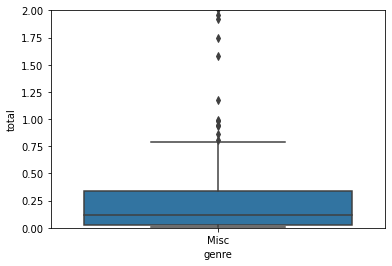

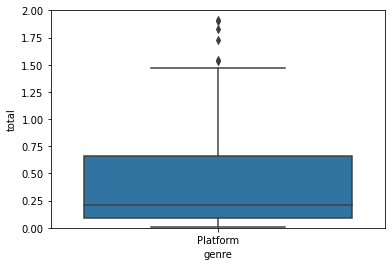

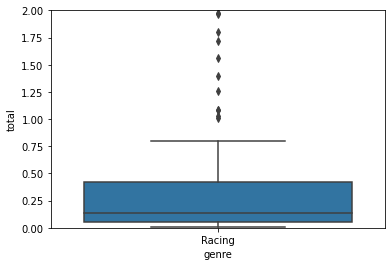

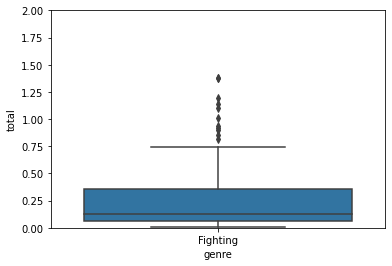

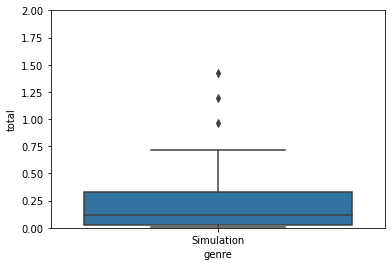

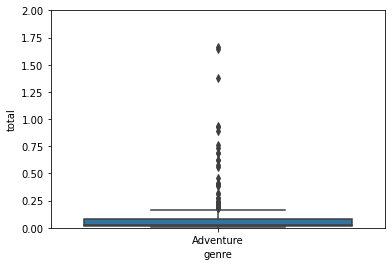

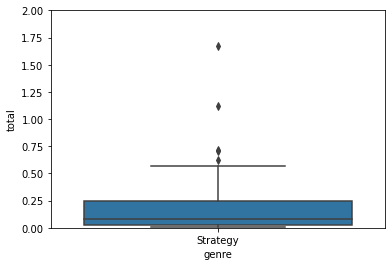

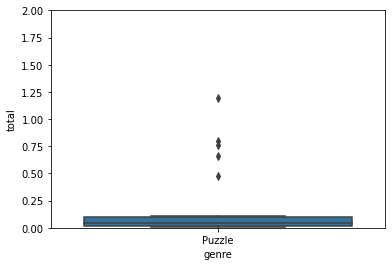

In [54]:
genre_list = ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc',
              'Platform', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle']

for genre in genre_list:
    ax = seaborn.boxplot(x="genre", y="total",
                         data= data_actual_time[data_actual_time['genre'] == genre])
    plt.ylim(0, 2) # уменьшил размах, чтобы лучше было видно боксплоты
    plt.show();

**Вывод:**

Если сравнить объёмы продаж каждого жанра, то на первый взгляд совершенно отчётливо видно, что уверенную тройку лидеров составляют `Action`, `Shooter` и `Role-Playing`. Причем экшен с хорошим отрывом занимает первое место. 

Но если обратить внимание на боксплот, то станет видно, что медиана продаж экшен игр находится даже не в топ 5. У некоторых жанров наблюдается большое количество выбросов, то есть игр - бестселлеров.Но для прибыльности нам нужны стабильные жанры, которые приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.

С учётом медианных значений от продаж самыми стабильными и продаваемыми жанрами являются:
- Shooter
- Sports
- Platform
- Role-Playing

### Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
print('NA:', data_actual_time['na'].sum(), 'миллинов копий')
print('EU:', round(data_actual_time['eu'].sum(), 2), 'миллинов копий') #пришлось округлить для красивого вывода
print('JP:', data_actual_time['jp'].sum(), 'миллинов копий')

NA: 590.97 миллинов копий
EU: 506.82 миллинов копий
JP: 192.58 миллинов копий


В Европе и Америке объём продаж более чем в 2 раза превышает продажи в Японии.

#### Самые популярные платформы (топ-5) в NA, EU, JP

In [56]:
region_list = ['na', 'eu', 'jp']
for region in region_list:
    print(data_actual_time.pivot_table(index = 'platform', values = region, aggfunc= 'sum')
         .sort_values(by = region, ascending = False).head(5))
    if region == 'na' or region == 'eu':
        print('----------------')

              na
platform        
X360      140.05
PS4       108.74
PS3       103.38
XOne       93.12
3DS        55.31
----------------
              eu
platform        
PS4       141.09
PS3       106.86
X360       74.52
XOne       51.59
3DS        42.64
----------------
             jp
platform       
3DS       87.79
PS3       35.29
PSV       21.04
PS4       15.96
WiiU      13.01


**Описать различия в долях продаж поможет круговая диаграмма**

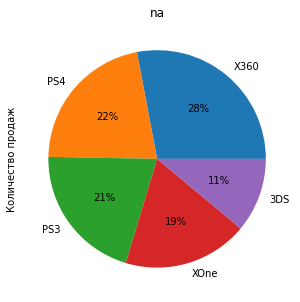

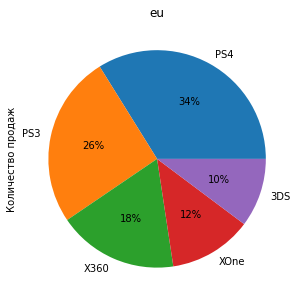

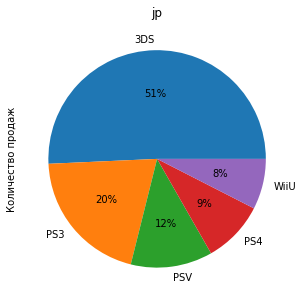

In [57]:
# прогоняем в цикле 3 региона
# строим по данным с 2012 года круговые диаграммы, на которых будет показан
# объём продаж топ 5-ти самых продаваемых платформ 
for region in region_list:
    (data_actual_time.pivot_table(index = 'platform', values = region, aggfunc= 'sum')
         .sort_values(by = region, ascending = False).head(5)
         .plot(kind = 'pie', y = region, figsize = (5, 5),
               legend = False, autopct='%1.0f%%', title = region, ylabel = 'Количество продаж')
    ) # autopct='%1.0f%%' - показывает на пайчартах доли 

**Вывод:**

Вся пятерка лидеров в Европе и в Америке совпадает.

- В Северной Америке лидеры по продажам распределились довольно равномерно. Самые продаваемые Х360, PlayStation4 и PlayStation3, 28%, 22%, 21% соответственно.

- В Европе же явным лидеров продаж была PS4, занимая 34% от всего рынка. PS3 - второе место, 26%, и X360 - третье место, 18%. 

- В Японии же более половины всех продаж, а именно 51%, составляет платформа 3DS, которая в Европе и в Америке занимала 5 место 10-11% от всего рынка. А PS3 и PS4 в сумме занимают 29%. 



#### Самые популярные жанры (топ-5).

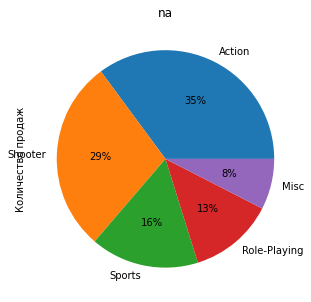

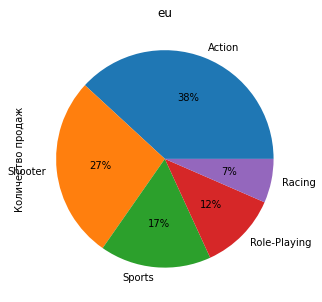

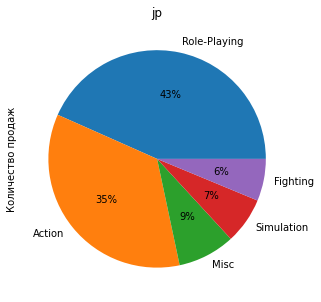

In [58]:
for region in region_list:
    (data_actual_time.pivot_table(index = 'genre', values = region, aggfunc= 'sum')
         .sort_values(by = region, ascending = False).head(5)
         .plot(kind = 'pie', y = region, figsize = (5, 5),
               legend = False, autopct='%1.0f%%', title = region, ylabel = 'Количество продаж')
    )

**Вывод:**

В Америке и в Европе практически с одинаковой точностью в топ 4 вошли такие жанры, как: actin(\~36%), shooter(\~28%), sports(\~17%), role-playing(\~13%). В то время как в Японии на первом месте основательно расположились ролевые игры 43%, на втором - экшен 35% (так, что в сумме эти два популярных жанра занимают \~78% от всех игр).

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Опишем категории**

- **E** - **everyone** для любых возрастов

- **E10+** - **everyone 10+** для возрастов от 10 лет и выше

- **M** - **mature** для взрослых 17+

- **T** - **teen** для возрастов от 13 лет и старше

In [59]:
# сгруппируем данные по рейтингу и подсчитаем продажи
data_actual_time.groupby('rating')[region_list].sum()

,na,eu,jp
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02
no_rating,103.31,91.50,108.84


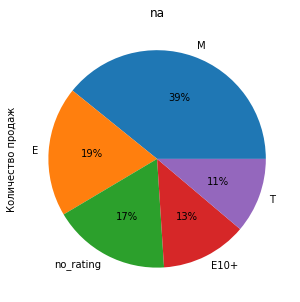

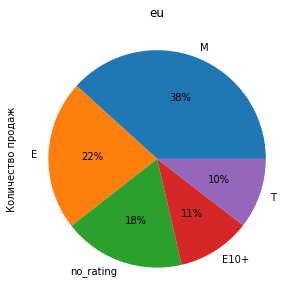

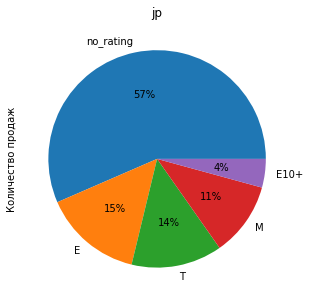

In [60]:
for region in region_list:
    (data_actual_time.pivot_table(index = 'rating', values = region, aggfunc= 'sum')
         .sort_values(by = region, ascending = False).head(5)
         .plot(kind = 'pie', y = region, figsize = (5, 5),
               legend = False, autopct='%1.0f%%', title = region, ylabel = 'Количество продаж')
    )

**Вывод:**

В Америке и в Европе самые продаваемые игры - игры для взросых. Их от всех продаж 38-39%. Далее идут игры для любых возрастов.

В Японии же 57% занимают игры без рейтинга. Так как рейтинг ESRB дейстивтелен только в США и Канаде, то другие игры, которые без рейтинга, могут быть предназначены для других стран. А 15% - для подростков 13+. 

#### Портрет пользователя:

В Европе и в Америке схожий портрет пользователя:
- самые популярные платформы - это PS4, PS3 и X360 (78% и 71% соответственно)
- самые популярные жанры - action и shooter (\~65%)
- самые популярные рейтинги - для взромслых и для всех (74% и 70%)

В Японии портрет пользователя выглядит следующим образов:
- платформа 3DS (51% от всех продаж)
- жанры - ролевые игры и action (77%)
- рейтинги - для любых возрастов и для подростков 13+ (65%)

### Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Нулевая гипотеза*: средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

*Альтернативная гипотеза*: средние пользовательские рейтинги платформ Xbox One и PC **различны**

In [62]:
part_XOne = data_actual_time.query('platform == "XOne" and user_score > 0.01')
part_PC = data_actual_time.query('platform == "PC" and user_score > 0.01')

alpha = .05 # общепринятое пороговое значение

results = st.ttest_ind(
    part_XOne['user_score'],
    part_PC['user_score'],
    equal_var=False) # берем факт, что дисперсии у рейтингов разные (хотя их, конечно, можно бы и посчитать)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Необходимо было сравнить средние двух генеральных совокупностей, не зависящих друг от друга.

1. Проверка гипотез начинается с формулировки нулевой гипотезы H₀. Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀.
2. Поскольку есть сомнения, что дисперсии у совокупностей одинаковые, указали параметр `equal_var` как `False`. Использовали t-критерий Стьюдента, так как у нас независимые выборки.

Таким образом, рейтинги платформ Xbox One и PC одинаковые и гипотеза *подтвердилась*.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

*Нулевая гипотеза*: средние пользовательские рейтинги жанров Action и Sports **одинаковые**

*Альтернативная гипотеза*: средние пользовательские рейтинги жанров Action и Sports **различны**

In [63]:
part_action = data_actual_time.query('genre == "Action" and user_score > 0.01')
part_sports = data_actual_time.query('genre == "Sports" and user_score > 0.01')

alpha = .05 # общепринятое пороговое значение

results = st.ttest_ind(
    part_action['user_score'],
    part_sports['user_score'],
    equal_var=False) # берем факт, что дисперсии у рейтингов разные (хотя их, конечно, можно бы и посчитать)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


In [64]:
print('Action:', part_action['user_score'].mean())
print('Sports:', part_sports['user_score'].mean())

Action: 6.825047801147227
Sports: 5.455897435897437


**Вывод:**

1. Нулевую гипотезу сформулировали обратным образом данной в задании. Чтобы нулевая гипотеза искала вероятность совпадения двух средних значений двух генеральных совокупностей.
2. Использовали двусторонний t-test, t-критерий Стьюдента, так как у нас независимые выборки.

Средние пользовательские рейтинги жанров Action и Sports действительно различаются и наша гипотеза *подтвердилась*.

### Общий вывод

В начале исследования были предоставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Они были представлены следующим образом:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Нужно было выявить определяющие успешность игры закономерности. Это позволило бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании*.

В ходе предобработки данных я переименовал столбцы. Пропуски в `name` и `genre` удалил. В столбце `year_of_release` заменили пропуски на 0. Также изучил значения в столбцах с оценкой критиков, пользователей и рейтингом. Пропуски в них могли возникнуть в силу того, что не все юзеры хотели оставлять оценку, не все оценки сохранились, или игры слишком новые, и их пока не успели оценить, поэтому неизвестных значений так много. Поэтому с пропущенными данными было решено ничего не предпринимать, они могли пригодиться для дальнейшего анализа. В столбце с рейтингом поставили заглушки на пропущенные значения, так как рейтинг ESRB действителен только в США и Канаде.

Далее приступил к исследовательскому анализу. Были заданы такие вопросы:
- Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Определите актуальный период и проведите анализ по нему. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

В результате анализа удалось выяснить, что:
1. Игры начали выпускать с 1980 года, но их количество в эти годы очень мало. Поэтому данные за период с 1980 по 1994 год не так важны для анализа. А вот период 2005-2010 года - был расцветом по созданию компьютерных игр.
2. Самые популярные по продажам платформы - это PS2, X360, PS3, Wii и DS. И в среднем платформы появляются и исчезают за 10 лет.
3. Из графиков, на которых видно, сколько игр выпускалось в разные годы, видно, что больше всего выпускалось в период с 2005 года и по 2016. Для наиболее точных прогнозов лучше всего было взять данные за последние годы, поэтому **актульным периодом** назвали последние года, начиная с 2012.
4. Во взятый **актуальный период** по продажам лидируют такие компании, как: PS4, PS3 и X360. Это мы можем увидеть на столбчатой диаграмме выше в пункте 3.4. Также можно увидеть, что все продажи падают. Самые хорошие продажи показывают компании PS4 и XOne, они являются потенциально самыми прибыльными.
5. В среднем одна игра, выпущенная на платформе PS4 или XOne приносит около 500 тысяч проданных копий. Однако, есть убыточные игры, как и, наоборот, очень популярные! Поэтому больше внимание стоит обратить на медианное значение - чуть менее 200 тысяч копий.
6. По данным двух самых популярных платформ в актуальный перид видно, что оценки пользователей НЕ влияют на продажи. Оценки критиков влияют на продажи, по графикам в пункте 3.6 видно, что чем больше оценка, тем выше продажи. Однако корреляция не сильная. Нельзя уверенно утверждать, что высокие оценки критиков являются причиной высоких продаж.
7. Зависимости продаж от оценок пользователей на других платформах нет, а от оценок критиков - слабая.
8. Самыми ппулярными и стабильными жанрами являются:Shooter, Sports, Platform и Role-Playing.

Далее после исследовательского анализа я составил **портрет пользователя** из Северной Америки, Европы и Японии.

В Европе и в Америке схожий портрет пользователя:
- самые популярные платформы - это PS4, PS3 и X360 (78% и 71% соответственно)
- самые популярные жанры - action и shooter (\~65%)
- самые популярные рейтинги - для взромслых и для всех (58% и 60%)

В Японии портрет пользователя выглядит следующим образов:
- платформа 3DS (51% от всех продаж)
- жанры - ролевые игры и action (77%)
- рейтинги - игры не для США и Канады, то есть игры без рейтинга ESRB (57%)

Также я проверил гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

В первой гипотезе полученное значение p-value говорит о том, что средние рейтинги платформ Xbox One и PC незначительно отличаются, с вероятностью почти в 55% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.
Таким образом, рейтинги платформ Xbox One и PC одинаковые и гипотеза *подтвердилась*.

Во второй же - средние пользовательские оценки жанров Action и Sports различаются. Значение p-value очень мало. Вероятность случайно получить такое отличие крайне мала. Следовательно, cредние пользовательские рейтинги жанров Action и Sports действительно различаются и наша гипотеза *подтвердилась*.

Резюмируем.

Две самые перспективные платформы - это PS4 и XOne. Их продажи за последние годы значительно выше остальных. Отзывы юзеров никак не влияют на продажи игр, а отзывы критиков влияют, но довольно слабо.

Самыми стабильными и прибыльными жанрами являются: Shooter, Sport, Platform и Role-Playing.

В Европе и в Америке лучше всего "отрекламировать" стрелялки на платформе PS4, так как они являются самыми стабильными и восстребованными. 

В Японии же лучше всего продадутся ролевые игры на платформе 3DS без рейтинга ESRB.